# HR Analytics


In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

### Load and study data

In [371]:
url = 'https://raw.githubusercontent.com/dphi-official/Datasets/master/HR_comma_sep.csv'
hrData = pd.read_csv(url)
data = hrData.copy()
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [372]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [373]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [374]:
#set a style to all the plots
sns.set_context('poster')
sns.set(font_scale=1)

### Exploratory Data Analysis

Text(0.5, 0.98, 'Countplot: Number of Projects vs Time spent in company')

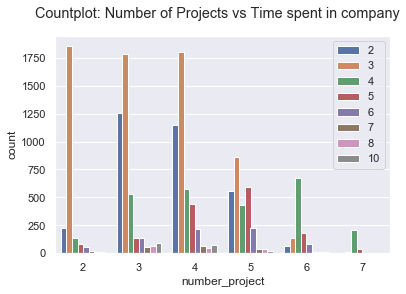

In [410]:
#lets see how number of projects is given to people who have stayed in the company over different duration
sns.countplot('number_project',hue='time_spend_company',data=data)
plt.legend(loc = 'upper right')
plt.suptitle('Countplot: Number of Projects vs Time spent in company')

Lets cross compare and group some parameters like **salary, number of projects, time spent in company** and if they **left**. This may give us some insight if there is a strong disparity over projects allocatment over seniority. Just a theory.

In [376]:
pd.crosstab([data.salary,data.left],[data.number_project],margins=True).style.background_gradient(cmap='summer_r')

In [377]:
pd.crosstab([data.salary,data.left],[data.time_spend_company],margins=True).style.background_gradient(cmap='summer_r')

In [378]:
data.groupby(['salary','time_spend_company'])['left'].sum()

salary  time_spend_company
high    2                       0
        3                      46
        4                      16
        5                      20
        6                       0
        7                       0
        8                       0
        10                      0
low     2                      22
        3                     986
        4                     541
        5                     488
        6                     135
        7                       0
        8                       0
        10                      0
medium  2                      31
        3                     554
        4                     333
        5                     325
        6                      74
        7                       0
        8                       0
        10                      0
Name: left, dtype: int64

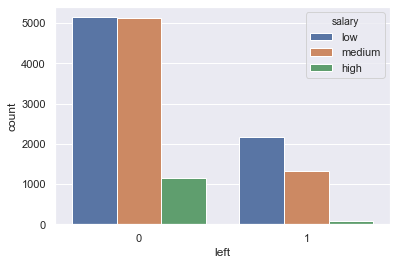

In [379]:
sns.countplot('left',hue='salary',data=data)

One interesting thing to be noticed was, **once the person works more than 6 years, they tend to stay, despite difference in pay,satisfaction_level or even number of projects**.
The following tabulation reiterates the above insight by segregating them across the number of projects handled based on each senioriy level

In [380]:
pd.crosstab([data.salary,data.left],[data.number_project,data.time_spend_company],margins=True).style.background_gradient(cmap='summer_r')

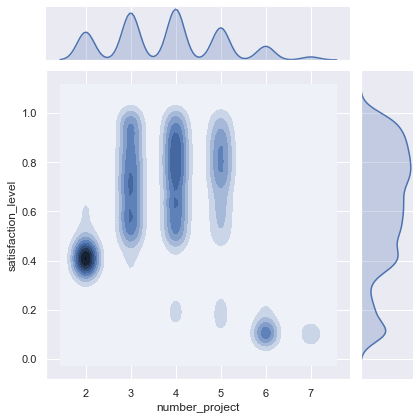

In [381]:
sns.jointplot('number_project','satisfaction_level',hue='salary',data=data,kind='kde')

As the **number of projects goes over 5 we notice a sharp drop in satisfaction_level**. Looks like 4 projects seems to be the sweet spot

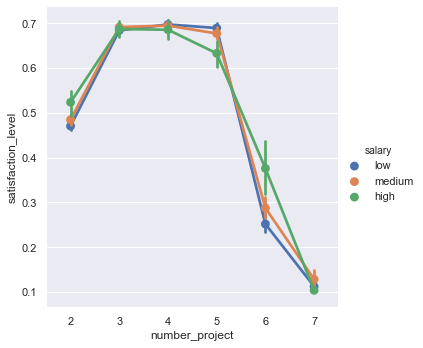

In [382]:
sns.catplot('number_project','satisfaction_level',hue='salary',data=data,kind='point')

The **satisfaction_level theory with respect to number of projects maintains invariably across the ranges of salary**. No matter the amount of money, too many projects seems to be severely frowned upon.

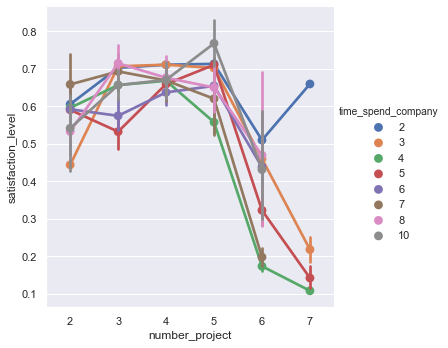

In [383]:
sns.catplot('number_project','satisfaction_level',hue='time_spend_company',data=data,kind='point')

We notice that irrespective of the time spent in the company, once the number of projects exceed 5 the satisfaction level drops; except for the 2nd year person, may be because he/she is excited to handle many projects and they thrive the learning opportunities.

Lets see how satisfaction correlates with the person staying in the company

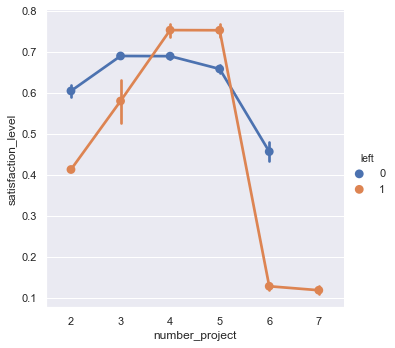

In [384]:
 sns.catplot('number_project','satisfaction_level',hue='left',data=data,kind='point')

This above plot shows uspeople with satisfaction level less than 60% predominantly left; except in case where people handling 6 projects did not (may be an insight into that category's salary might give a better understanding).

Also people with high satisfaction level and optimum number of projects may have left because they have been head hunted.They sure seem to be like high flyers.

**People who handle 7 projects definitely leave**

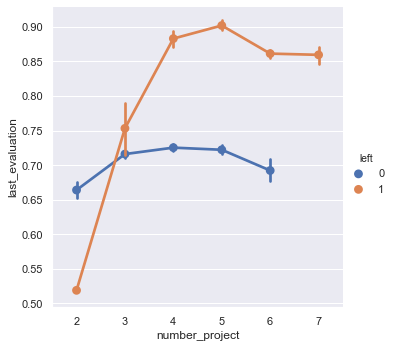

In [385]:
 sns.catplot('number_project','last_evaluation',hue='left',data=data,kind='point')

Ok, this gives a clear indicator, **people with high evaluation left**

In [411]:
# sns.catplot('salary','number_project',hue='left',data=data,kind='point')

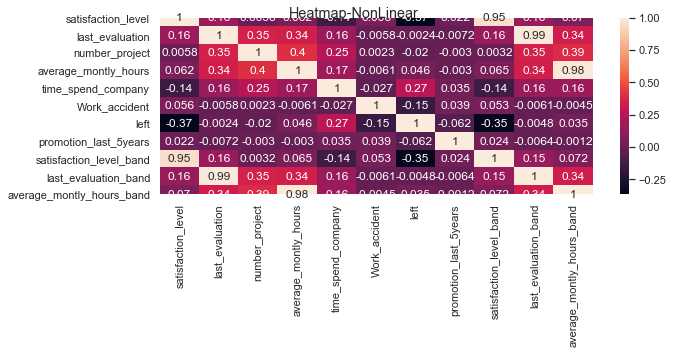

In [413]:
#lets see how the factors are correlated
fig = plt.figure(figsize=(10,5))
plt.suptitle('Heatmap-NonLinear')
sns.heatmap(data.corr('spearman'),annot=True) #non linear
plt.tight_layout()

In [388]:
# from sklearn.preprocessing import MinMaxScaler

# norm = MinMaxScaler()
# numCols = data.select_dtypes(np.number).columns
# # numCols
# # data[numCols]
# norm_data = pd.DataFrame(norm.fit_transform(data[numCols]),columns=numCols)
# norm_data

In [389]:
# sns.pairplot(norm_data,diag_kind='kde',hue='left')

### Bin Convert select columns

In [414]:
def binConverter(featureList,n):
    for k in featureList:
        diff = data[k].max()-data[k].min()
        cRange=diff/float(n)
        l = data[k].min()
        llim = l
        ulim = llim+cRange
        newName=k+'_band'
        data[newName]=0
        for i in range(10):
            data.loc[((data[k]>=llim)&(data[k]<ulim)),newName]=i
            llim=ulim
            ulim+=cRange
            
#lets convert some range values to bins            
fBin = ['satisfaction_level','last_evaluation','average_montly_hours']            
binConverter(fBin,10)

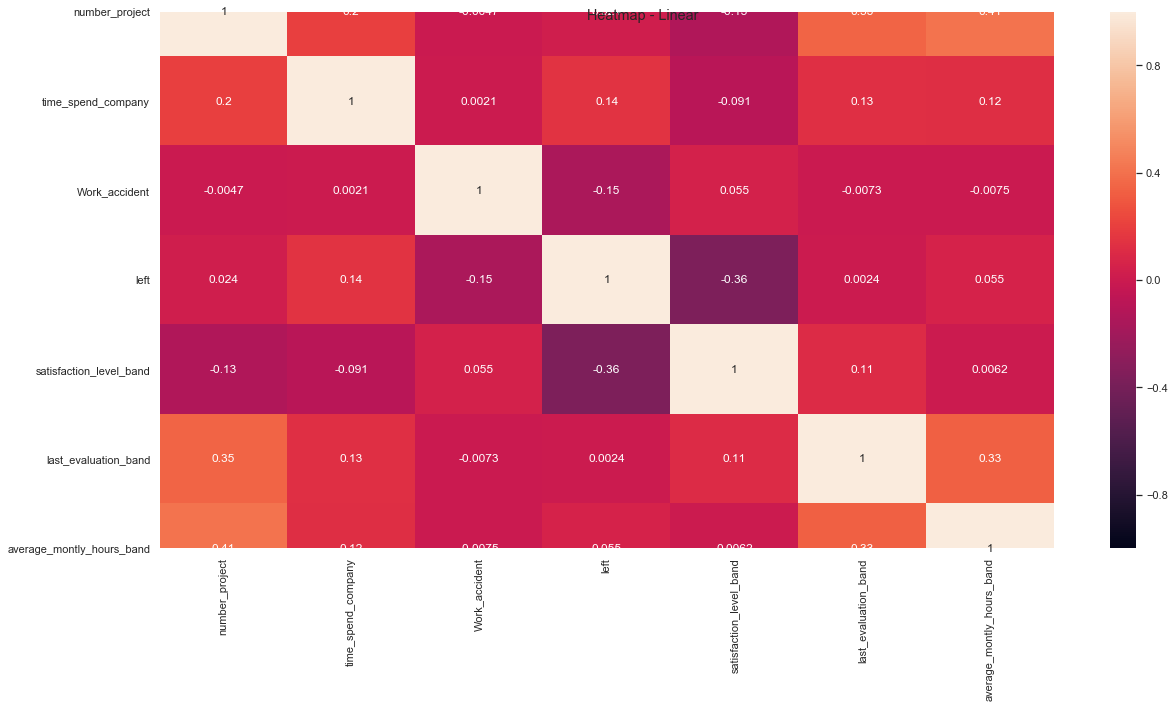

In [416]:
# data.columns
#create a separate copy of data
modData = data.copy()

#drop the binned columns
modData.drop(fBin,axis=1,inplace=True)

#drop non correalted columns
modData.drop('promotion_last_5years',axis=1,inplace=True)

#visualize a heatmap to see how the new modifications have worked
fig = plt.figure(figsize=(18,10))
plt.suptitle('Heatmap - Linear')
sns.heatmap(modData.corr(),annot=True,vmax=1,vmin=-1)
plt.tight_layout()

### One Hot Encoding

In [393]:
#prep data for encoding
featuresToConv = ['salary','time_spend_company','last_evaluation_band','average_montly_hours_band','number_project']
modData = pd.get_dummies(modData,columns=featuresToConv)

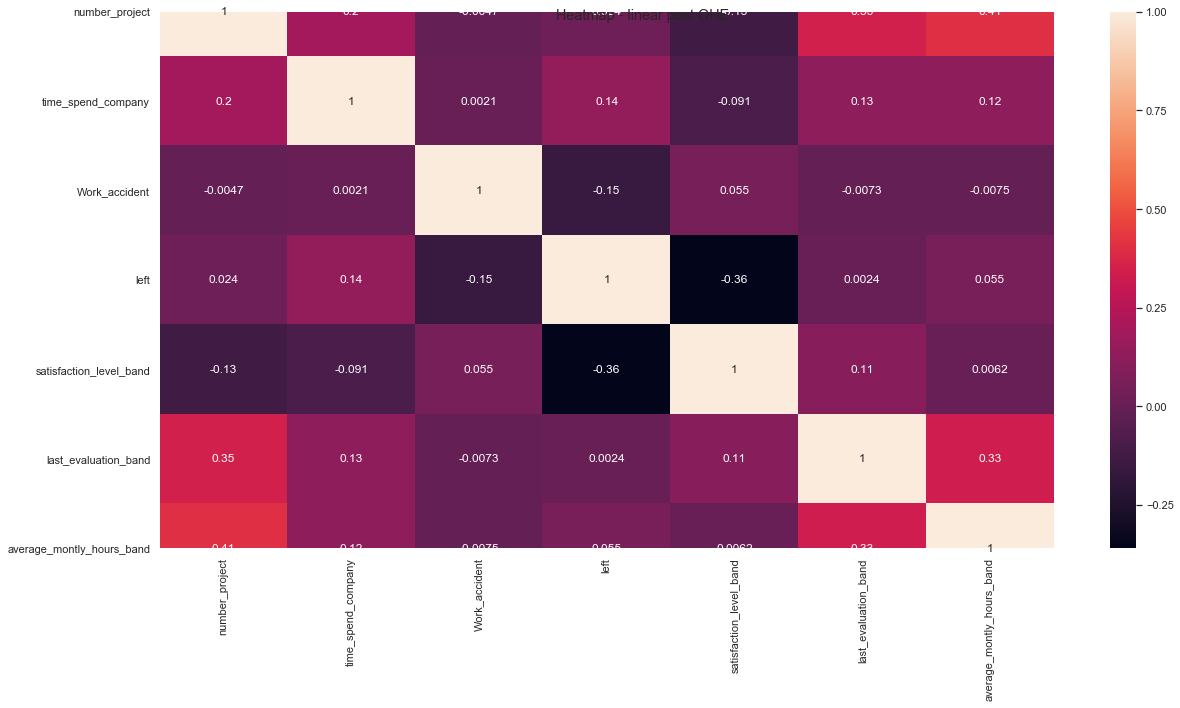

In [418]:
fig = plt.figure(figsize=(18,10))
sns.heatmap(modData.corr(),annot=True)
plt.suptitle('Heatmap - linear post OHE')
plt.tight_layout()

### Normalize data

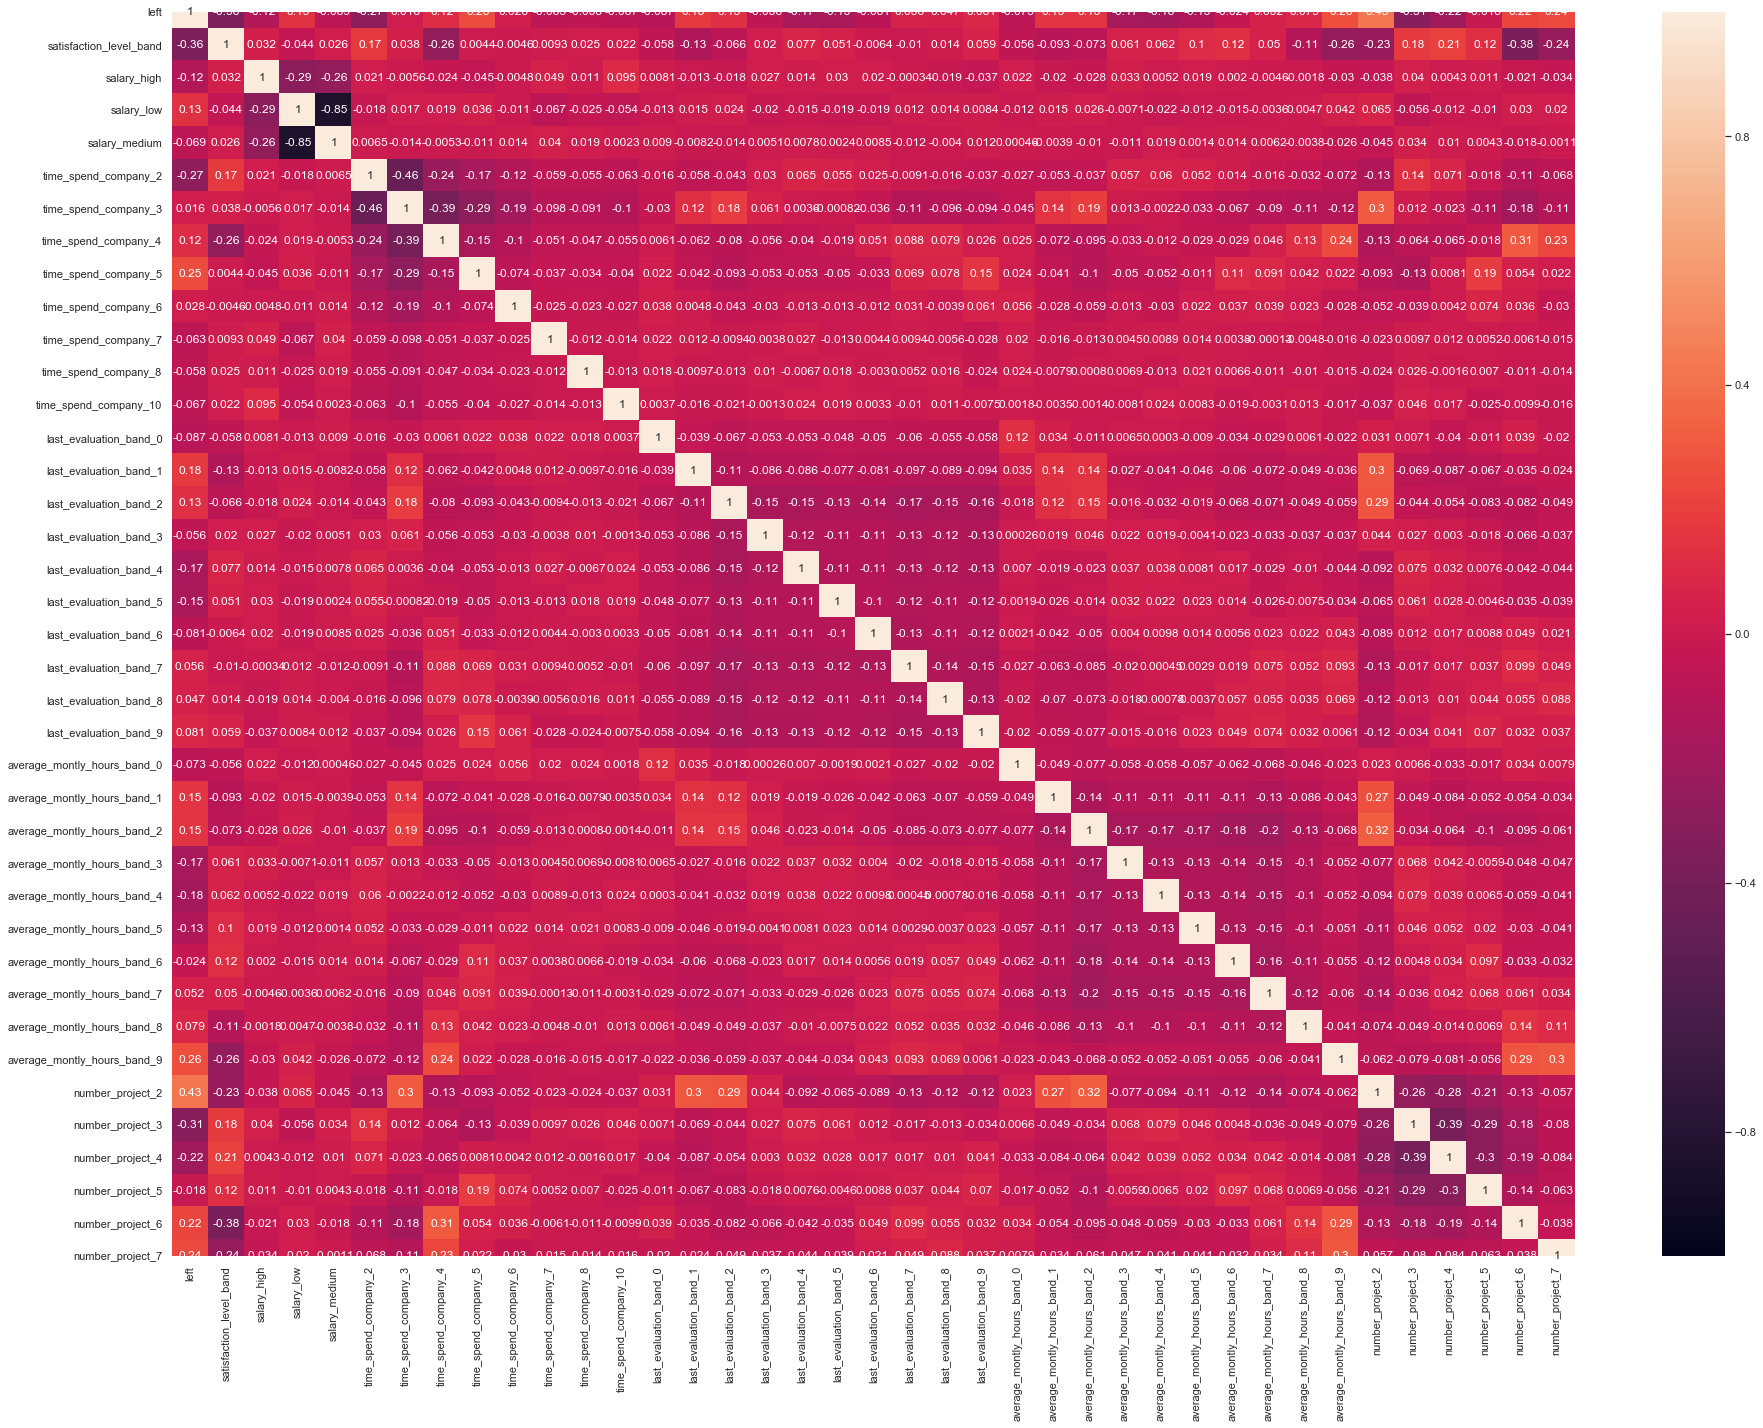

In [395]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
numCols = modData.select_dtypes(np.number).columns

norm_data = pd.DataFrame(norm.fit_transform(modData[numCols]),columns=numCols)
fig = plt.figure(figsize=(27,20))
sns.heatmap(norm_data.corr(),annot=True,vmax=1,vmin=-1)
plt.tight_layout()

### Model Preparation

In [396]:
X = norm_data.drop('left',axis=1)
y = norm_data['left']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

### LogisticRegression

In [397]:
from sklearn.linear_model import LogisticRegression

#create an objecct of the model
logFit = LogisticRegression()

#train the model
logFit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [419]:
#use kfold.lose one type cross validation to get a better understanding of the model's metrics across dataset
from sklearn.model_selection import cross_validate

cvRes = cross_validate(logFit,X, y, cv=10, scoring=["accuracy", "precision", "recall"])
print('cv accuracy mean:',cvRes['test_accuracy'].mean())
print('cv precision mean:',cvRes['test_precision'].mean())
print('cv recall mean:',cvRes['test_recall'].mean())

cv accuracy mean: 0.9297971031987127
cv precision mean: 0.8453725739877642
cv recall mean: 0.8641691313396868


In [420]:
#predict training data
y_pred = logFit.predict(X_test)

#### LogisticRegression metrics

In [400]:
from sklearn.metrics import r2_score, recall_score, confusion_matrix,accuracy_score
from sklearn.metrics import matthews_corrcoef,f1_score


test_acc = accuracy_score(y_test,y_pred)
train_acc = accuracy_score(y_train,logFit.predict(X_train))

mCorr = matthews_corrcoef(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)

print('training accuracy: ',train_acc)
print('testing accuracy: ',test_acc)

print('*'*40)

print('Matthews Coeff: ',mCorr)
print('F1 score: ',f1Score)
print('r2 score: ',r2_score(y_test,y_pred))

print('Sensitivity: ',recall_score(y_test,y_pred))
print('Specificity: ',recall_score(y_test,y_pred,pos_label=0))

training accuracy:  0.9332444370364197
testing accuracy:  0.9236666666666666
****************************************
Matthews Coeff:  0.7928735823493309
F1 score:  0.8430431802604523
r2 score:  0.579904900742596
Sensitivity:  0.8589385474860335
Specificity:  0.9439579684763573


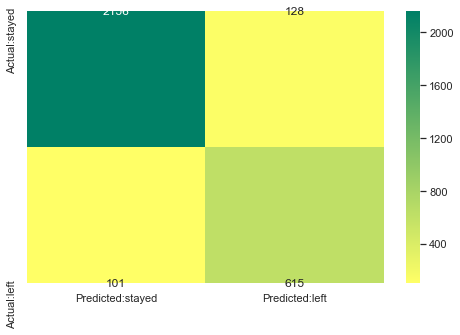

In [401]:
#we use confusion matrix to see how correctly the model has predicted
cm = confusion_matrix(y_test,y_pred)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:stayed','Predicted:left'],index=['Actual:stayed','Actual:left'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="summer_r")

Our model has higher specificity and slightly lower sensitivity. Also our r2 score was 60% better than our baseline.

#### LogisticRegression parameter Tuning

Let's consider some parameters of the model's class, try varying them and see which parameters gives us the best possible result

In [404]:
paramsToTune={'class_weight':[None,"balanced"],'fit_intercept':[True,False]}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(logFit,paramsToTune,cv=3)
grid.fit(X_train,y_train)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [421]:
#see the best combination
grid.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [434]:
#now use the best combination to improve our model's performance

gridLr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

gridLr.fit(X_train,y_train)
y_pred = gridLr.predict(X_test)

test_acc = accuracy_score(y_test,y_pred)
train_acc = accuracy_score(y_train,gridLr.predict(X_train))

mCorr = matthews_corrcoef(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)

print('training accuracy: ',train_acc)
print('testing accuracy: ',test_acc)

print('*'*40)

print('Matthews Coeff: ',mCorr)
print('F1 score: ',f1Score)
print('r2 score: ',r2_score(y_test,y_pred))

print('Sensitivity: ',recall_score(y_test,y_pred))
print('Specificity: ',recall_score(y_test,y_pred,pos_label=0))

res = [test_acc,recall_score(y_test,y_pred),recall_score(y_test,y_pred,pos_label=0),mCorr,f1Score,r2_score(y_test,y_pred)]
result = pd.DataFrame(data=res,columns=['LogisticRegression'],index=['Accuracy','Sensitivity','Specificity', 'Matthews Score','F1 Score','R2 Score'])


training accuracy:  0.9331610967580631
testing accuracy:  0.9236666666666666
****************************************
Matthews Coeff:  0.7928735823493309
F1 score:  0.8430431802604523
r2 score:  0.579904900742596
Sensitivity:  0.8589385474860335
Specificity:  0.9439579684763573


,LogisticRegression
Accuracy,0.923667
Sensitivity,0.858939
Specificity,0.943958
Matthews Score,0.792874
F1 Score,0.843043
R2 Score,0.579905


**we notice in our case there is no change in metrics after tuning paramters**. Maybe we need to utilize different paramters. But we will find out more with expereince.

### DecisionTreeClassifier

In [423]:
from sklearn.tree import DecisionTreeClassifier


tModel = DecisionTreeClassifier()
tModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### DecisionTreeClassifier Metrics

In [427]:
paramsTree = {'max_depth':range(3,8)}
gridTree = GridSearchCV(tModel,paramsTree,cv=3)
gridTree.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(3, 8)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=

In [428]:
gridTree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [438]:
#retrain with modified parameters
modModel = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

modModel.fit(X_train,y_train)
y_pred = modModel.predict(X_test)

test_acc = accuracy_score(y_test,y_pred)
train_acc = accuracy_score(y_train,modModel.predict(X_train))

mCorr = matthews_corrcoef(y_test,y_pred)
f1Score = f1_score(y_test,y_pred)

print('training accuracy: ',train_acc)
print('testing accuracy: ',test_acc)

print('*'*40)

print('Matthews Coeff: ',mCorr)
print('F1 score: ',f1Score)
print('r2 score: ',r2_score(y_test,y_pred))

print('Sensitivity: ',recall_score(y_test,y_pred))
print('Specificity: ',recall_score(y_test,y_pred,pos_label=0))

#add to result df
res = [test_acc,recall_score(y_test,y_pred),recall_score(y_test,y_pred,pos_label=0),mCorr,f1Score,r2_score(y_test,y_pred)]
result['DecisionTreeClassifier'] = res


training accuracy:  0.9669139094924577
testing accuracy:  0.9583333333333334
****************************************
Matthews Coeff:  0.8841925619581306
F1 score:  0.9111584932480454
r2 score:  0.7706904480036004
Sensitivity:  0.8952513966480447
Specificity:  0.978108581436077


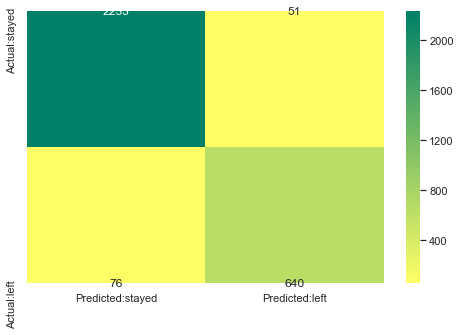

In [436]:
cmTree = confusion_matrix(y_test,y_pred)

conf_matrix=pd.DataFrame(data=cmTree,columns=['Predicted:stayed','Predicted:left'],index=['Actual:stayed','Actual:left'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="summer_r")

The DecisionTreeClassifier seems to be doing much better than LogisticRegression in this case. We notice a significant increase in all the metrics. athis model is 76% better than our baseline model. 
Wec ould play around with the test sample to further ensure we have a decent model to predict the employer's state

In [437]:
result

,LogisticRegression,DecisionTreeClassifier
Accuracy,0.923667,0.957667
Sensitivity,0.858939,0.893855
Specificity,0.943958,0.977671
Matthews Score,0.792874,0.882335
F1 Score,0.843043,0.909737
R2 Score,0.579905,0.767021
